<h3>A Term deposit</h3>
: is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.

In [2]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
#SInce data is separated by semicolon 
data = pd.read_csv("bank-additional-full.csv", sep=';')

#converting the dependent variable into dummy one
y = pd.get_dummies(data['y'], columns = ['y'], prefix = ['y'], drop_first = True)

data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon ...         1    999         0  nonexistent          1.1   
1   may         mon ...         1    999         0  nonexistent          1.1   
2   may         mon ...         1    999         0  nonexistent          1.1   
3   may         mon ...         1    999         0  nonexistent          1.1   
4   may         mon ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
data.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [7]:
#there is not any null value in the dataset
data.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool


   # Analyzing Bank client data:
   
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired",
   "self-employed","services","student","technician","unemployed","unknown")
   
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or
   widowed)
   
   4 - education (categorical:
   "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")

In [8]:
#Consolidating  all of the features related to bank client 
bank_client = data.iloc[: , 0:7]
bank_client.head()

age        job  marital    education  default housing loan
0   56  housemaid  married     basic.4y       no      no   no
1   57   services  married  high.school  unknown      no   no
2   37   services  married  high.school       no     yes   no
3   40     admin.  married     basic.6y       no      no   no
4   56   services  married  high.school       no      no  yes

<h4> Visualizing each of them one by one </h4>


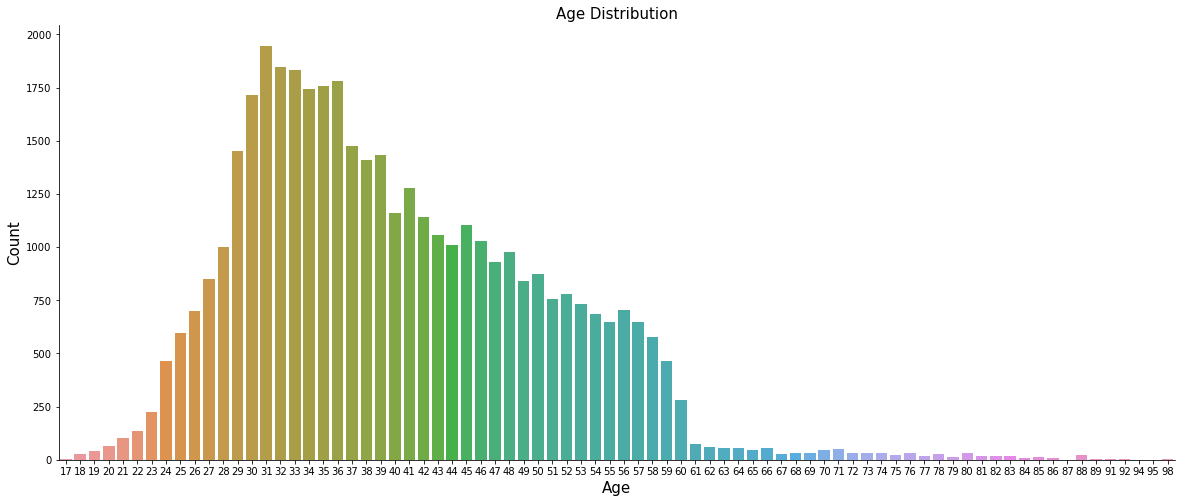

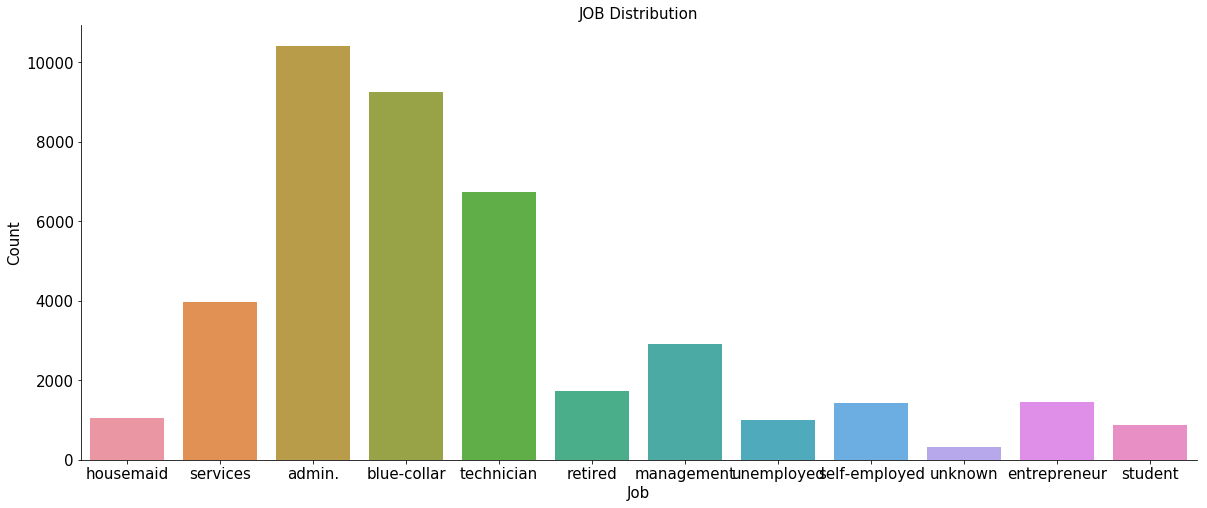

In [9]:
#age

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Distribution', fontsize=15)
sns.despine()

#job

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('JOB Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

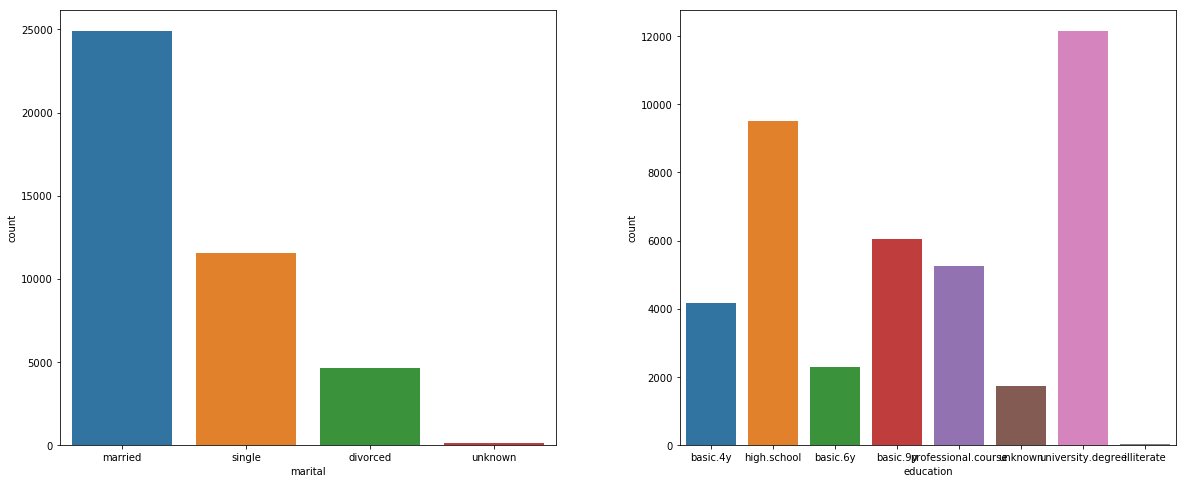

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))

#marital

sns.countplot(x = 'marital', data = bank_client,ax=ax1)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Distribution', fontsize=15)
ax.tick_params(labelsize=15)

#education

sns.countplot(x = 'education', data = bank_client,ax=ax2)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Distribution', fontsize=15)
ax.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

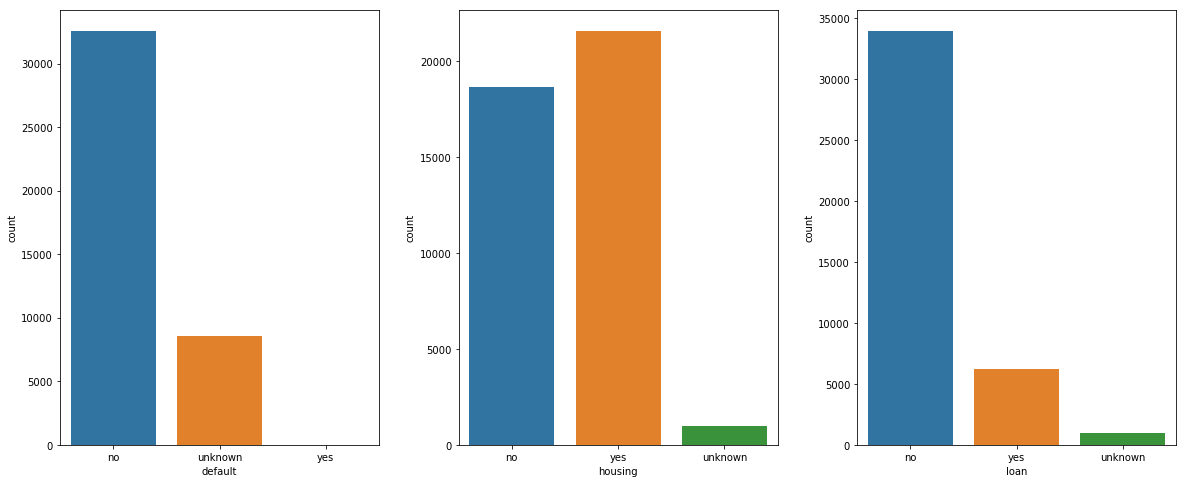

In [11]:
fig, (ax1, ax2 , ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))

#default

sns.countplot(x = 'default', data = bank_client,ax=ax1)
ax.set_xlabel('default', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Default Distribution', fontsize=15)
ax.tick_params(labelsize=15)

#housing

sns.countplot(x = 'housing', data = bank_client,ax=ax2)
ax.set_xlabel('housing', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Housing Distribution', fontsize=15)
ax.tick_params(labelsize=15)

#loan

sns.countplot(x = 'loan', data = bank_client,ax=ax3)
ax.set_xlabel('loan', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Loan Distribution', fontsize=15)
ax.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

<h3>Conclusion : </h3><p> write here </p>


In [12]:
#categorical variables: (except 'age' ,  all 6 features are categorical)
print('Jobs:\n', bank_client['job'].unique())
print('Marital:\n', bank_client['marital'].unique())
print('Education:\n', bank_client['education'].unique())
print('Default:\n', bank_client['default'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Marital:
 ['married' 'single' 'divorced' 'unknown']
Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


In [13]:
#encoding each of the categorical variable
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 

In [14]:
# here 78 distinct type of ages are present(17*4+10) , age also need groupings
bank_client['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

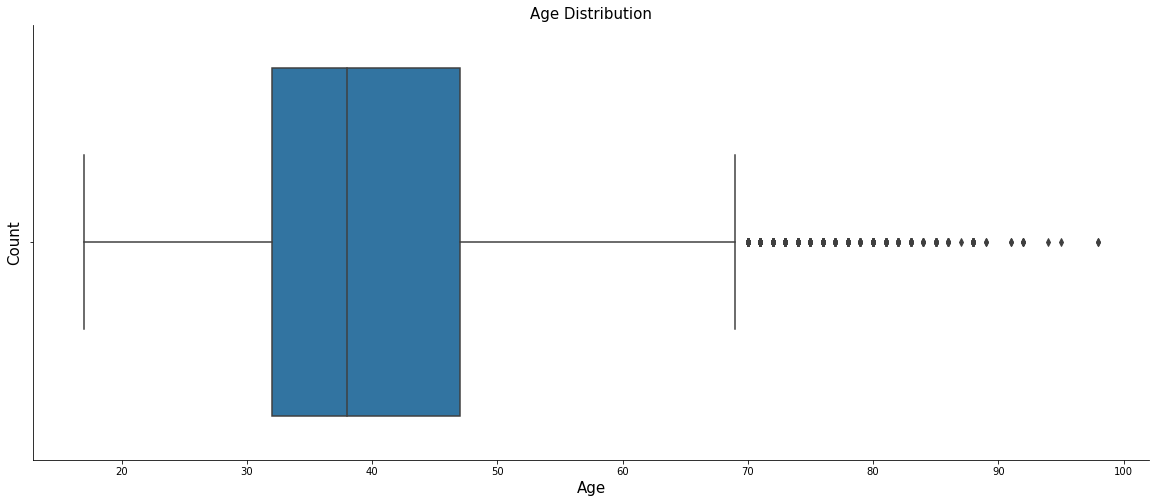

In [15]:
#discovering outliers with visualization tools like boxplot

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.boxplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Distribution', fontsize=15)
sns.despine()

<p><h3>Outlier</h3>
   <ui>
   <li><strong>An OUTLIER is a data point in a data set that is distant from all other observations. </strong>It can be due to variability in the data or due to an experimental error. It can skew the data , and can cause signifcant impact on mean and std.<li>
   <ui><strong>How can we identify an outlier?</strong>
       <li>using scatter plots</li>
       <li>using Z score</li>
       <li>using the IQR interquartile range</li>
   </ui>
   
   <br>
    
  
  
  <ui>
      
    <img src="files/image.png">
    
   </ui>
   <br>
   <oi><strong>Steps to find outliers using IQR</strong>
      <br>
	<li>Arrange the data in increasing order</li>
	<li>Calculate first(q1) and third quklfvdartile(q3)</li>
	<li>Find interquartile range (q3-q1)</li>
	<li>Find lower bound = q1 -(1.5 * iqr) </li>
	<li>Find upper bound = q2 +(1.5 * iqr) </li>
	<li>Anything that lies outside of lower and upper bound is an outlier</li>
</oi>
</p>

In [16]:
# Quartiles
print('Q1: ', bank_client['age'].quantile(q = 0.25))
print('Q2: ', bank_client['age'].quantile(q = 0.50))
print('Q3: ', bank_client['age'].quantile(q = 0.75))
print('Q4: ', bank_client['age'].quantile(q = 1.00))

    
print('Ages above: ', bank_client['age'].quantile(q = 0.75) + 
                      1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'are outliers')
print('Ages below: ', bank_client['age'].quantile(q = 0.25) - 
                      1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'are outliers')

Q1:  32.0
Q2:  38.0
Q3:  47.0
Q4:  98.0
Ages above:  69.5 are outliers
Ages below:  9.5 are outliers


In [17]:
# we have to create groupings to work with them
def age_grouping(value):
    value.loc[value['age']<=32,'age'] = 1
    value.loc[(value['age']>32) & (value['age']<=38) , 'age'] = 2
    value.loc[(value['age']>38) & (value['age']<=47) , 'age'] = 3
    value.loc[(value['age']>47) & (value['age']<=70) , 'age'] = 4
    value.loc[(value['age']>70) & (value['age']<=98) , 'age'] = 5
    return value
age_grouping(bank_client);   

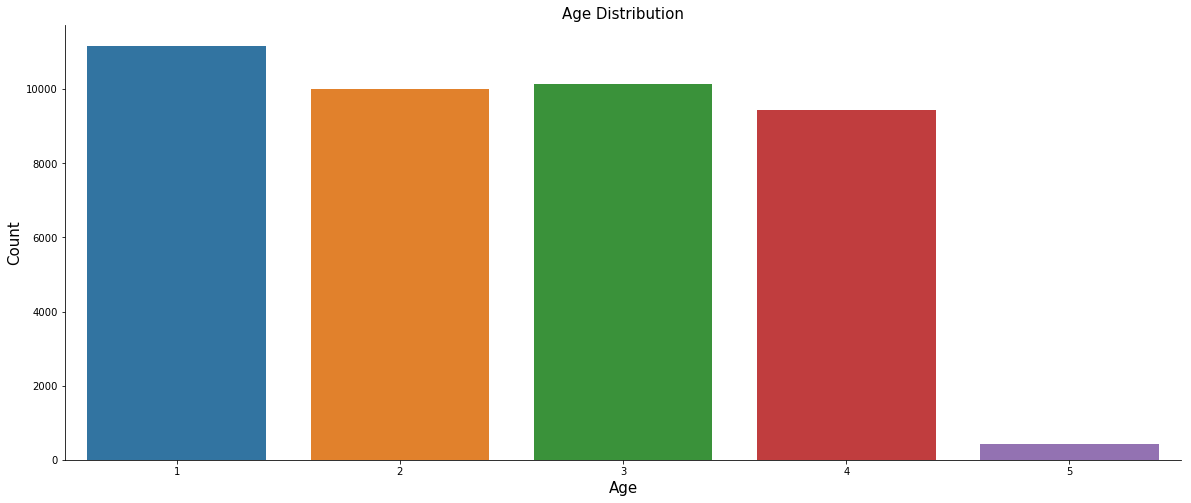

In [18]:
# Now the age distribution becomes : 

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Distribution', fontsize=15)
sns.despine()


In [50]:
# if the call duration is Equal to 0, then is obviously that this person didn't subscribed, 
# THIS LINES NEED TO BE DELETED LATER 
data[(data['duration'] == 0)]

age          job   marital          education default housing loan  \
6251    39       admin.   married        high.school      no     yes   no   
23031   59   management   married  university.degree      no     yes   no   
28063   53  blue-collar  divorced        high.school      no     yes   no   
33015   31  blue-collar   married           basic.9y      no      no   no   

         contact month day_of_week ...  campaign  pdays  previous  \
6251   telephone   may         tue ...         4    999         0   
23031   cellular   aug         tue ...        10    999         0   
28063   cellular   apr         fri ...         3    999         0   
33015   cellular   may         mon ...         2    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
6251   nonexistent          1.1          93.994          -36.4      4.857   
23031  nonexistent          1.4          93.444          -36.1      4.965   
28063  nonexistent         -1.8          93.075          -47.1      1.479   
33015  nonexistent         -1.8          92.893          -46.2      1.299   

       nr.employed   y  
6251        5191.0  no  
23031       5228.1  no  
28063       5099.1  no  
33015       5099.1  no  

[4 rows x 21 columns]

#    Related with the last contact of the current campaign:
   
   8 - contact: contact communication type (categorical: "cellular","telephone")
   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target
  (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed.

In [19]:
#Consolidating  all of the features related to bank client 
last_contact = data.iloc[: , 7:11]
last_contact.head()

contact month day_of_week  duration
0  telephone   may         mon       261
1  telephone   may         mon       149
2  telephone   may         mon       226
3  telephone   may         mon       151
4  telephone   may         mon       307

<h4> Visualizing each of them one by one </h4>


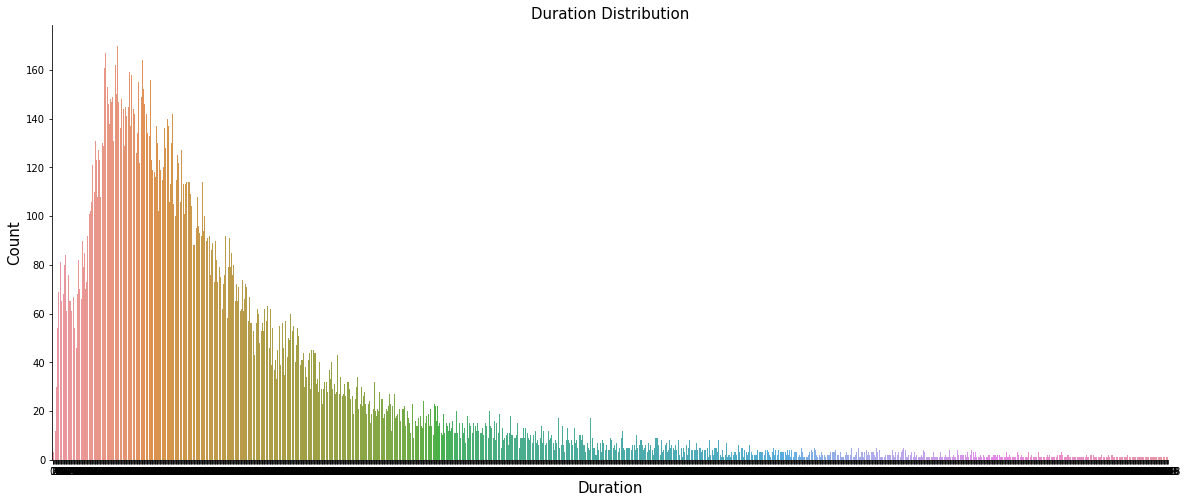

In [20]:
#duration

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'duration', data = last_contact)
ax.set_xlabel('Duration', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Duration Distribution', fontsize=15)
sns.despine()

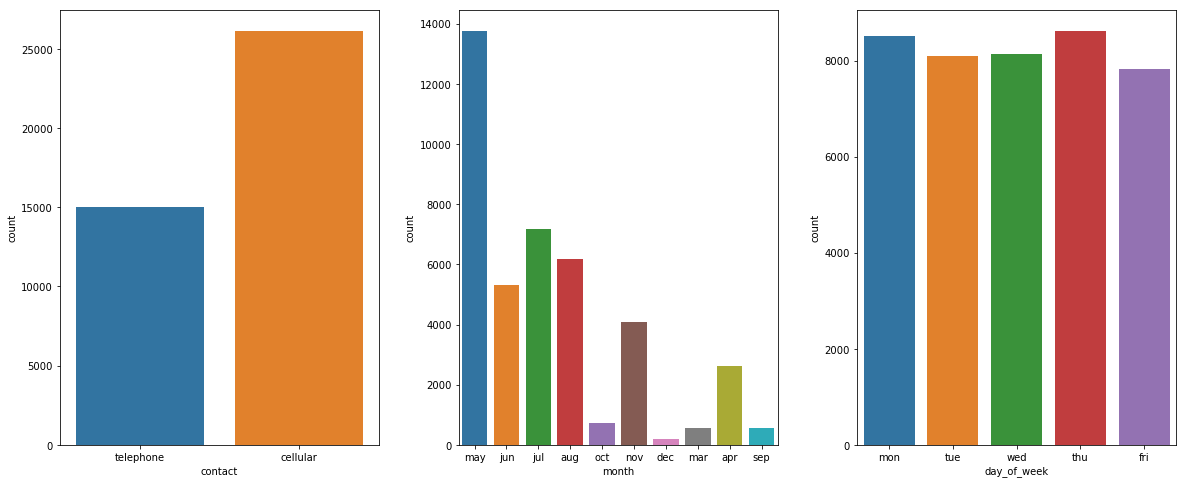

In [21]:
fig, (ax1, ax2 , ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))

#contact

sns.countplot(x = 'contact', data = last_contact,ax=ax1)
ax.set_xlabel('contact', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Contact Distribution', fontsize=15)
ax.tick_params(labelsize=15)

#month

sns.countplot(x = 'month', data = last_contact,ax=ax2)
ax.set_xlabel('month', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Month Distribution', fontsize=15)
ax.tick_params(labelsize=15)

#day_of_week

sns.countplot(x = 'day_of_week', data = last_contact,ax=ax3)
ax.set_xlabel('day_of_week', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Week Day Distribution', fontsize=15)
ax.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [22]:
#Except duration , other 3 are categorical and need to be encoded.
print(" Contact: \n", last_contact['contact'].unique())
print("Month: \n", last_contact['month'].unique())
print("Day of the week : \n", last_contact['day_of_week'].unique())

 Contact: 
 ['telephone' 'cellular']
Month: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Day of the week : 
 ['mon' 'tue' 'wed' 'thu' 'fri']


In [23]:
#Encoding of the categorical variable
labelencoder_X = LabelEncoder()
last_contact['contact']     = labelencoder_X.fit_transform(last_contact['contact']) 
last_contact['month']       = labelencoder_X.fit_transform(last_contact['month']) 
last_contact['day_of_week'] = labelencoder_X.fit_transform(last_contact['day_of_week']) 

In [24]:
# durations are  present just like age in the previous section , so duration also need groupings
last_contact['duration'].unique()

array([ 261,  149,  226, ..., 1246, 1556, 1868], dtype=int64)

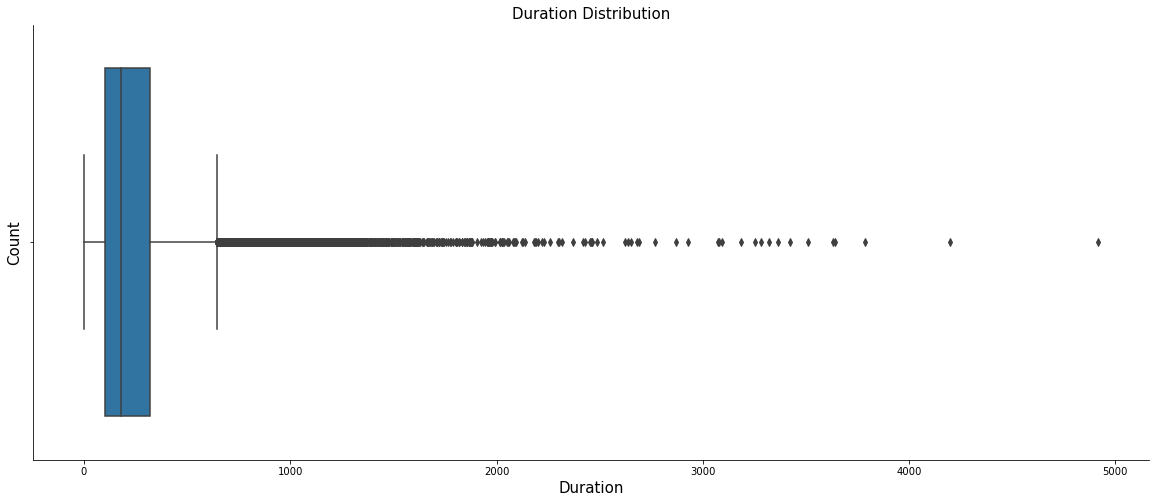

In [25]:
#discovering outliers with visualization tools like boxplot

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.boxplot(x = 'duration', data = last_contact)
ax.set_xlabel('Duration', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Duration Distribution', fontsize=15)
sns.despine()

In [26]:
# Quartiles
print('Q1: ', last_contact['duration'].quantile(q = 0.25))
print('Q2: ', last_contact['duration'].quantile(q = 0.50))
print('Q3: ', last_contact['duration'].quantile(q = 0.75))
print('Q4: ', last_contact['duration'].quantile(q = 1.00))

    
print('duration above: ', last_contact['duration'].quantile(q = 0.75) + 
                      1.5*(last_contact['duration'].quantile(q = 0.75) - last_contact['duration'].quantile(q = 0.25)), 'are outliers')
print('duration below: ', last_contact['duration'].quantile(q = 0.25) - 
                      1.5*(last_contact['duration'].quantile(q = 0.75) - last_contact['duration'].quantile(q = 0.25)), 'are outliers')

Q1:  102.0
Q2:  180.0
Q3:  319.0
Q4:  4918.0
duration above:  644.5 are outliers
duration below:  -223.5 are outliers


In [27]:

# we have to create groupings to work with them

def duration_grouping(value):
    value.loc[value['duration']<=102,'duration'] = 1
    value.loc[(value['duration']>102) & (value['duration']<=180) , 'duration'] = 2
    value.loc[(value['duration']>180) & (value['duration']<=319) , 'duration'] = 3
    value.loc[(value['duration']>319) & (value['duration']<=644.5) , 'duration'] = 4
    value.loc[value['duration']>644.5,'duration'] = 5
    return value
duration_grouping(last_contact);   

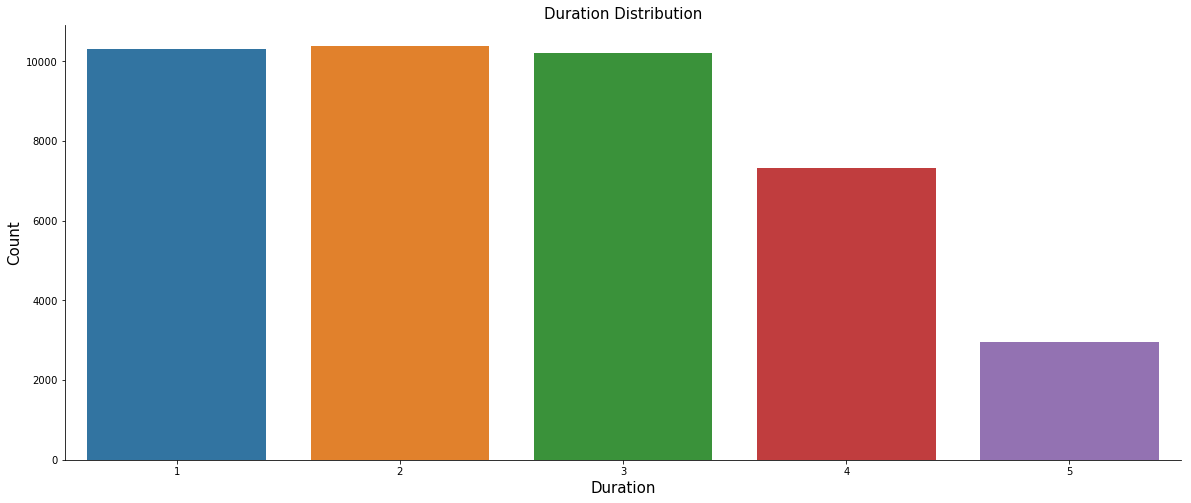

In [28]:
# Now the age distribution becomes : 

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'duration', data = last_contact)
ax.set_xlabel('Duration', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Duration Distribution', fontsize=15)
sns.despine()

 # Other attributes:
 
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means
  client was not previously contacted)
  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  
  

In [29]:
other_attr = data.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
other_attr.head()

campaign  pdays  previous     poutcome
0         1    999         0  nonexistent
1         1    999         0  nonexistent
2         1    999         0  nonexistent
3         1    999         0  nonexistent
4         1    999         0  nonexistent

In [30]:
other_attr['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [31]:
other_attr['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [32]:
other_attr.tail()

campaign  pdays  previous  poutcome
41183         1    999         0         1
41184         1    999         0         1
41185         2    999         0         1
41186         1    999         0         1
41187         3    999         1         2

   # Social and economic context attributes
   
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)
  
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
  
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  
  20 - nr.employed: number of employees - quarterly indicator (numeric)

In [33]:
socio_economic = data.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
socio_economic.head()

emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
0           1.1          93.994          -36.4      4.857       5191.0
1           1.1          93.994          -36.4      4.857       5191.0
2           1.1          93.994          -36.4      4.857       5191.0
3           1.1          93.994          -36.4      4.857       5191.0
4           1.1          93.994          -36.4      4.857       5191.0

# Let's design the model

In [34]:
final_data= pd.concat([bank_client, last_contact, socio_economic, other_attr], axis = 1)
final_data.shape

(41188, 20)

In [35]:
final_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data, y, test_size = 0.2)

#K-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [37]:
X_train.head()


age  job  marital  education  default  housing  loan  contact  month  \
10495    1    9        2          6        0        2     0        1      4   
4491     3    1        1          0        1        0     0        1      6   
35908    1    0        1          6        0        0     0        0      6   
28284    3    1        1          2        0        2     0        0      0   
31492    4    0        0          6        0        2     0        0      6   

       day_of_week  duration  emp.var.rate  cons.price.idx  cons.conf.idx  \
10495            3         1           1.4          94.465          -41.8   
4491             3         1           1.1          93.994          -36.4   
35908            1         2          -1.8          92.893          -46.2   
28284            4         3          -1.8          93.075          -47.1   
31492            4         4          -1.8          92.893          -46.2   

       euribor3m  nr.employed  campaign  pdays  previous  poutcome  
10495      4.961       5228.1         2    999         0         1  
4491       4.856       5191.0         8    999         0         1  
35908      1.264       5099.1         1    999         0         1  
28284      1.445       5099.1         1    999         1         2  
31492      1.334       5099.1         3    999         0         1

<h4>Feature Scaling </h4>

In [38]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

<h2> Let's fit the data with differnet classifier </h2>

In [39]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)

#Confusion matrix
print(confusion_matrix(y_test, logpred))
print('Accuracy:' , round(accuracy_score(y_test, logpred),2)*100)
print('Other Reports\n',classification_report(y_test, logpred))

#Applying cross validationon logistic regression model
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7114  150]
 [ 597  377]]
Accuracy: 91.0
Other Reports
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7264
           1       0.72      0.39      0.50       974

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.82      0.68      0.73      8238
weighted avg       0.90      0.91      0.90      8238



In [40]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7135  129]
 [ 713  261]]
90.0


In [41]:
#SVM
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6715  549]
 [ 623  351]]
86.0


In [42]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6776  488]
 [ 482  492]]
88.0


In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6995  269]
 [ 490  484]]
91.0


In [44]:
# !pip install xgboost

In [45]:
# #XGBoost
# from xgboost import XGBClassifier
# xgb = XGBClassifier()
# xgb.fit(X_train, y_train)
# xgbprd = xgb.predict(X_test)

# print(confusion_matrix(y_test, xgbprd ))
# print(round(accuracy_score(y_test, xgbprd),2)*100)
# XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

In [46]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7035  229]
 [ 482  492]]
91.0


In [47]:
#Summary of the model
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model',   'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV,  GBKCV]})

models.sort_values(by='Score', ascending=False)

Models     Score
5         Gradient Boosting  0.913809
0  Random Forest Classifier  0.909044
4            Logistic Model  0.908832
3          K-Near Neighbors  0.904158
1  Decision Tree Classifier  0.885493
2    Support Vector Machine  0.855417

<h3> Accuracy </h3>